In [246]:
import numpy as np
import sympy as sp

In [247]:
l2 = 1
l3 = 2
l4 = 4
l5 = 1.9

In [248]:
# we know l1>0, which implies theta4 = 0.5236

t = sp.symbols("t")
l1 = sp.Function("l_1")(t)
theta4 = sp.Function("theta_4")(t)
x = sp.Function("x")(t)
theta5 = sp.Function("theta_5")(t)
theta2 = sp.Function("theta_2")(t)

In [279]:
OMEGA = 1  # rad/s
ALPHA = 0  # rad/s²

In [ ]:
def full_solve(theta2val:float)->list:
    f1 = l1*sp.cos(theta4)-l2*sp.cos(theta2)-l3
    f2 = l1*sp.sin(theta4)-l2*sp.sin(theta2)
    f1_val = f1.subs(theta2, theta2val).evalf()
    f2_val = f2.subs(theta2, theta2val).evalf()
    list_of_vars = []
    _list = sp.solve([f1_val, f2_val], [l1, theta4])
    for i in sp.solve([f1_val, f2_val], [l1, theta4]):  # We know we will get only 1 value from the physical constraints. thus, we don't actually need to append possx list, but we can just create it. Just for the sake of good programming practice, I am appending the possx list
        if i[0]<0:
            _list.remove(i)
        else:
            theta4i = float(i[1])
            l1i = float(i[0])
            g1 = l4*sp.cos(theta4)+l5*sp.cos(theta5)-4
            g2 = l4*sp.sin(theta4)-l5*sp.sin(theta5)-x
            g2theta4eval = g2.subs(theta4, theta4i).evalf()
            g1theta4eval = g1.subs(theta4, theta4i).evalf()
            listvar2 = sp.solve([g1theta4eval, g2theta4eval], [x, theta5])
            for j in listvar2:
                if j[1]<=np.pi/2:
                    xj = float(j[0])
                    theta5j = float(j[1])
                    
    solve1deg = {l1: l1i, theta4: theta4i, theta5: theta5j,  x: xj}
    
    dotl1 = sp.Function("l_1d")(t)
    dotx = sp.Function("x_d")(t)
    dottheta4 = sp.Function("theta_4d")(t)
    dottheta5 = sp.Function("theta_5d")(t)
    
    subs2degdict = {sp.Derivative(theta4, t): dottheta4, sp.Derivative(l1, t): dotl1, sp.Derivative(x, t): dotx, sp.Derivative(theta5, t): dottheta5,
                    theta4: theta4i, l1: l1i, x: xj, theta5: theta5j,
                    sp.Derivative(theta2, t):OMEGA, theta2:theta2val}
    
    dotf1 = sp.diff(f1, t)
    dotf2 = sp.diff(f2, t)
    dotg1 = sp.diff(g1, t)
    dotg2 = sp.diff(g2, t)
    
    dotf1_val = sp.diff(f1, t).subs(subs2degdict).evalf()
    dotf2_val = sp.diff(f2, t).subs(subs2degdict).evalf()
    dotg1_val = sp.diff(g1, t).subs(subs2degdict).evalf()
    dotg2_val = sp.diff(g2, t).subs(subs2degdict).evalf()
    
    solve2deg = sp.solve([dotf1_val, dotf2_val, dotg1_val, dotg2_val], [dotl1, dottheta4, dotx, dottheta5],list = True)
    
    ddotl1 = sp.Function("l_1dd")(t)
    ddotx = sp.Function("x_dd")(t)
    ddottheta4 = sp.Function("theta_4dd")(t)
    ddottheta5 = sp.Function("theta_5dd")(t)
    
    subs3degdict = {
                    sp.Derivative(theta4, t): dottheta4, sp.Derivative(l1, t): dotl1, sp.Derivative(x, t): dotx, sp.Derivative(theta5, t): dottheta5,
                    sp.Derivative(theta4, t, t): ddottheta4, sp.Derivative(l1, t, t): ddotl1, sp.Derivative(x, t, t): ddotx, sp.Derivative(theta5, t, t): ddottheta5,
                    theta4: theta4i, l1: l1i, x: xj, theta5 : theta5j,
                    
                    sp.Derivative(theta2,t,t):ALPHA, sp.Derivative(theta2, t):OMEGA, theta2:theta2val}
    # {dotl1}
    
    ddotf1_val = sp.diff(dotf1, t).subs(subs3degdict).evalf()
    ddotf2_val = sp.diff(dotf2, t).subs(subs3degdict).evalf()
    ddotg1_val = sp.diff(dotg1, t).subs(subs3degdict).evalf()
    ddotg2_val = sp.diff(dotg2, t).subs(subs3degdict).evalf()
    solve3deg = sp.solve([ddotf1_val, ddotf2_val, ddotg1_val, ddotg2_val], [ddotl1, ddottheta4, ddotx, ddottheta5])
    for i in solve3deg:
        solve3deg[i] = solve3deg[i].subs(solve2deg)
    return [solve1deg, solve2deg, solve3deg]
    # solve3deg = sp.solve_linear_system([ddotf1, ddotf2, ddotg1, ddotg2], sp.Derivative(l1,t,t), sp.Derivative(theta4,t,t), sp.Derivative(x,t,t), sp.Derivative(theta5,t,t))

In [250]:
import time
starttime = time.time()
final_x = full_solve(40*np.pi/180)
endtime = time.time()
print("Time to calculate: ", endtime-starttime, "s")
# print("Final x: ", final_x)

Time to calculate:  2.1562273502349854 s


# Plot $x$, $v$, $a$

Another thing to observe is that it almost takes 1 second to calculate $x$ for one value of $\theta_2$. For higher resolution, it will take up more time. Trying with a resolution that's fine enough, as well as accounts for time is crucial.

In [251]:
theta2degRESOL = 20
theta2list = np.arange(0, 361, theta2degRESOL) * np.pi / 180
xlist = [[float(list(result[i].values())[3]) for i in range(3)]
         for theta2 in theta2list
         for result in [full_solve(theta2)]]

In [278]:
xlist = np.array(xlist)

In [253]:
import matplotlib.pyplot as plt

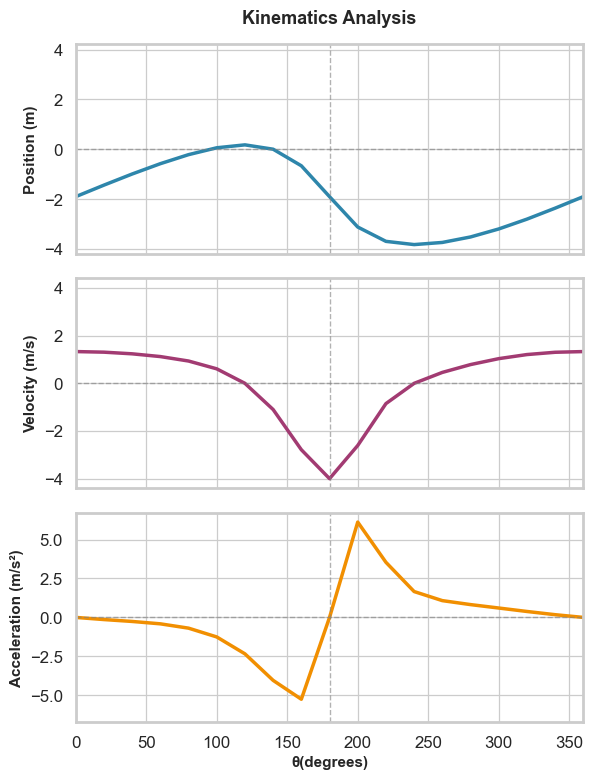

In [281]:
theta2_deg = theta2list * 180 / np.pi

fig, axes = plt.subplots(3,1, figsize=(6, 8), sharex=True)

colors = ['#2E86AB', '#A23B72', '#F18F01']

axes[0].plot(theta2_deg, xlist[:, 0], color=colors[0], linewidth=2.5)
axes[0].set_ylabel('Position (m)', fontsize=11, fontweight='bold')
axes[0].axhline(0, color='gray', linewidth=1, linestyle='--', alpha=0.6)
axes[0].axvline(180, color='gray', linewidth=1, linestyle='--', alpha=0.6)
axes[0].set_title('Kinematics Analysis', fontsize=13,
                  fontweight='bold', pad=15)
axes[0].set_ylim([-abs(xlist[:, 0].min() * 1.1),
                 abs(xlist[:, 0].min() * 1.1)])

axes[1].plot(theta2_deg, xlist[:, 1], color=colors[1], linewidth=2.5)
axes[1].set_ylabel('Velocity (m/s)', fontsize=11, fontweight='bold')
axes[1].axhline(0, color='gray', linewidth=1, linestyle='--', alpha=0.6)
axes[1].axvline(180, color='gray', linewidth=1, linestyle='--', alpha=0.6)
axes[1].set_ylim([-abs(xlist[:, 1].min() * 1.1), abs(xlist[:, 1].min() * 1.1)])

axes[2].plot(theta2_deg, xlist[:, 2], color=colors[2], linewidth=2.5)
axes[2].set_ylabel('Acceleration (m/s²)', fontsize=11, fontweight='bold')
axes[2].set_xlabel('θ(degrees)', fontsize=11, fontweight='bold')
axes[2].axhline(0, color='gray', linewidth=1, linestyle='--', alpha=0.6)
axes[2].axvline(180, color='gray', linewidth=1, linestyle='--', alpha=0.6)
axes[2].set_ylim([-abs(xlist[:, 2].max() * 1.1), abs(xlist[:, 2].max() * 1.1)])

for ax in axes:
    ax.set_xlim(0, 360)
    ax.grid(True, alpha=1, linewidth=0.9)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()